In [1]:
import os
import sys
#SERVE PER POTER IMPORTARE I FILE .PY DALLA CARTELLA SOURCE
sys.path.append('..')
sys.path.append('..\data')


In [3]:
#ora src è un pacchetto e posso usare la classica dot notation di python
from src.data_load_notebook  import *
#import pandas as pd
# ||||||||||è un utilizzo un pò improprio di import, basta ricordare che così importiamo pandas
from src import classes
from src import funzioni
from src import cluster_routine
import numpy as np


In [4]:
picchi1 = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':1.5*10**-6})

picchi2 = classes.Spettri(data2,npicchi=None,prop={'height':(None,None),'prominence':1.5*10**-6})



In [ ]:
#come cambia in funzione della prominence il numero di picchi che vengono trovati?
dic = pd.DataFrame({})
for n,pr in enumerate(np.linspace(10**-6,10**-5,10)):
    cl = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':pr})
    cl.normalizer()
    cl.peakfinder()
    feat = cl.featextract(statlist=['mean','std','count'])
    dic[f'{n}_esimo_pr-{pr}']= feat['count']
    del cl
    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
dic.T.iloc[:,10:20].plot(figsize=(20,8),grid=True, xlim=(None,None))


In [5]:
#questa è una routine base prima normalizza i dati e poi ne calcola i picchi
# le proprietà sono salvate come attributo dell'istanza [.picchi è un attributo aggiuntivo creato .peakfinder() ]

picchi1.peakfinder()
picchi2.peakfinder()
pass

con 2 clusters : 0.8325340838980354
con 3 clusters : 0.6628980197588246
con 4 clusters : 0.515447760895428
con 5 clusters : 0.5117384011727942
con 6 clusters : 0.40579140694764493
con 7 clusters : 0.4058486272936131
con 8 clusters : 0.401321131949551
con 9 clusters : 0.3428084619624659
con 10 clusters : 0.3334267549753465


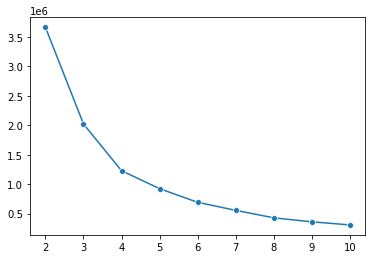

con 2 clusters : 0.7621277124587997
con 3 clusters : 0.6794191425975319
con 4 clusters : 0.6870746423681606
con 5 clusters : 0.7113376583486041
con 6 clusters : 0.6877131495301773
con 7 clusters : 0.6808836705130102
con 8 clusters : 0.6982604690884764
con 9 clusters : 0.520221757963823
con 10 clusters : 0.5211493554838318


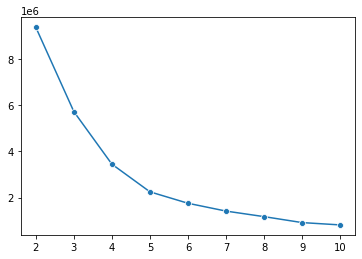

In [6]:
#per ora utilizzo un metodo per l'estrazione delle feature senza che esso salvi il risultato in nessun attributo ma ritornandolo
feat_picchi1= picchi1.featextract(cols=['peak_heights','prominences','K'],statlist=['mean','std','count'])
feat_picchi2 = picchi2.featextract(cols=['peak_heights','prominences','K'], statlist=['mean','std','count'])
km1_list= cluster_routine.km_cluster_plt(feat_picchi1,plot=True)
km2_list =  cluster_routine.km_cluster_plt(feat_picchi2.dropna(),plot=True)
feat_picchi1['labels_km']=  km1_list[3].labels_
feat_picchi2['labels_km']= km2_list[3].labels_

In [10]:
feat_picchi1

,peak_heights_mean,peak_heights_std,prominences_mean,prominences_std,K_mean,K_std,count,labels_km
row1col1,0.000245,0.000093,0.000007,0.000017,2237.017796,1081.879438,280.0,0
row1col2,0.000287,0.000081,0.000008,0.000032,2418.584069,1067.901461,204.0,0
row1col3,0.000226,0.000123,0.000006,0.000014,2286.814625,1054.044861,289.0,0
row1col4,0.000242,0.000092,0.000007,0.000021,2251.696377,1063.485504,292.0,0
row1col5,0.000255,0.000078,0.000006,0.000018,2138.144468,1086.943304,196.0,2
...,...,...,...,...,...,...,...,...
row11col7,0.000273,0.000108,0.000005,0.000017,2103.786407,1037.607781,216.0,2
row11col8,0.000261,0.000062,0.000003,0.000004,2010.029531,1122.052144,162.0,2
row11col9,0.000370,0.000113,0.000005,0.000022,2855.606837,881.912545,104.0,3
row11col10,0.000288,0.000045,0.000012,0.000023,1235.672350,1492.800475,6.0,1


In [ ]:
sns.pairplot(data=feat_picchi1,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_km')

In [ ]:
sns.pairplot(data=feat_picchi2,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_km')

In [ ]:
score1=[]
for x in km1_list:
    
    score1.append(cluster_routine.silhouette_score(feat_picchi1,x.labels_))

In [ ]:
score2=[]
for x in km2_list:
    
    score2.append(cluster_routine.silhouette_score(feat_picchi2,x.labels_))

In [ ]:
score1

In [ ]:
sns.lineplot(data=score1,label='score1')
sns.lineplot(data=score2,label='score2')

In [ ]:
db1list = cluster_routine.db_cluster_plt(feat_picchi1,n_components=2, eps= 0.55, min_samples=4)


In [ ]:
db2list = cluster_routine.db_cluster_plt(feat_picchi2)

In [ ]:
feat_picchi2['labels_db'] = db2list[-2].labels_
feat_picchi1['labels_db'] = db1list[4].labels_

sns.pairplot(data=feat_picchi2,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_db')

In [ ]:

sns.pairplot(data=feat_picchi1,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_db')